In [12]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
df_train = pd.read_csv("../train.csv") # 학습용 데이터
df_test = pd.read_csv("../submission.csv") # 테스트 데이터(제출파일의 데이터)

# 데이터 계수 파악
len(df_train), len(df_test)

(59299, 5271)

## 신규 Columns 추가
---
* 밴 다이어그램을 통한 분류화
* 사람의 관심도를 표현하기 위해서 `customer_interest`로 명명.


In [18]:
def label_rows(row):
    if row['product_modelname'] is np.nan and row['product_subcategory'] is np.nan and row['product_category'] is np.nan:
        return 8
    elif row['product_modelname'] is np.nan and row['product_subcategory'] is np.nan:
        return 7
    elif row['product_modelname'] is np.nan and row['product_category'] is np.nan:
        return 6
    elif row['product_subcategory'] is np.nan and row['product_category'] is np.nan:
        return 5
    elif row['product_modelname'] is np.nan:
        return 4
    elif row['product_subcategory'] is np.nan:
        return 3
    elif row['product_category'] is np.nan:
        return 2
    else:
        return 1

df_train['customer_interest'] = df_train.apply(lambda row: label_rows(row), axis=1)


## 결과

In [20]:
df_train.groupby('customer_interest')['is_converted'].mean()

customer_interest
1    0.147267
2    0.087719
3    0.102041
4    0.145729
5    0.005242
6    0.117021
7    0.076323
8    0.064555
Name: is_converted, dtype: float64

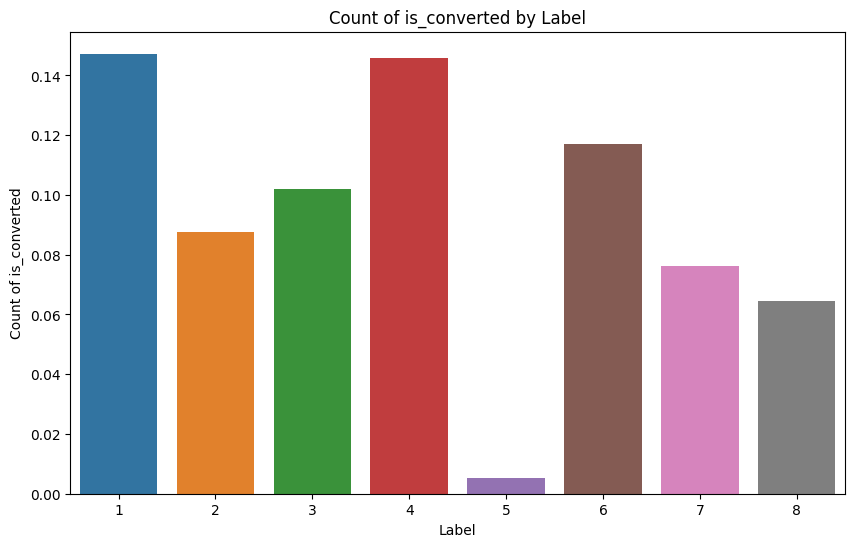

In [21]:
label_converted_count = df_train.groupby('label')['is_converted'].mean().reset_index()

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
sns.barplot(x='label', y='is_converted', data=label_converted_count)
plt.xlabel('Label')
plt.ylabel('Count of is_converted')
plt.title('Count of is_converted by Label')
plt.show()